# 3D-Random-Groups

### Want to know if a large scale structure of galaxies in the sky is the result of a random alignment? Check what is expected from a random distribution
This code checks the number of randomly grouped objects within a volume V, using a delta_z range, specified for scanning.

    Editable parameters: 

    -region volume V (right ascension range,  declination range, redshift range)

    -number of objects inside volume V

    -redshift interval for scanning

    -number of random distributions (default is 10000)



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
import math

# Use custom style for larger fonts and figures
plt.style.use('guide.mplstyle')


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin



## Editable parameters

In [2]:
delta_z=0.018 #faixa em que se buscam os grupos (2x este valor)
n1=1 # número de galáxias com mag M1
n2=7 # número de galáxias com mag M2
n3=32 # número de galáxias com mag M3
n4=12 # número de galáxias com mag M4
RA1=34179 # (limite inferior) ascensão reta com 3 casas decimais, medida em graus, multiplicada por 1000
RA2=34293 # (limite superior) ascensão reta com 3 casas decimais, medida em graus, multiplicada por 1000
DEC1=7257 # (limite inferior) declinação com 3 casas decimais, medida em graus, multiplicada por 1000
DEC2=7502 #(limite superior) declinação com 3 casas decimais, medida em graus, multiplicada por 1000
Z1=35 #redshift (limite inferior) x 10
Z2=46 # redshift (limite superior) x 10
nrd=10000 # número de distribuições randômicas geradas. Padrão é nrd=10.000

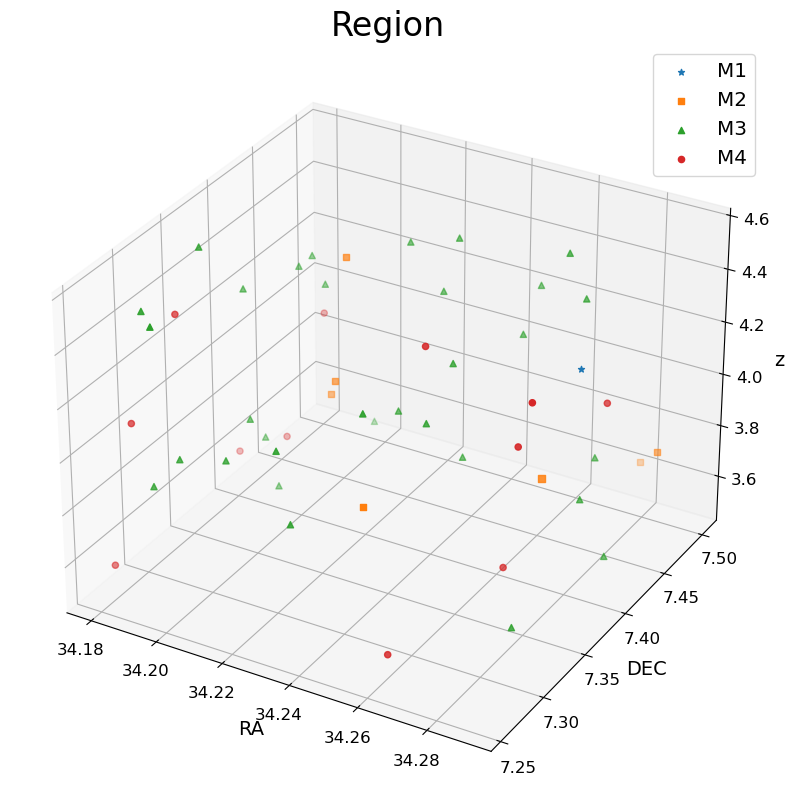



Foram encontrados, em 10000 distribuições randômicas de 52 galáxias:

84648 grupos de 3 galáxias (ocorreu em  100.0 % das distribuições randômicas)
44378 grupos de 4 galáxias (ocorreu em  99.24 % das distribuições randômicas)
17387 grupos de 5 galáxias (ocorreu em  81.05 % das distribuições randômicas)
5351 grupos de 6 galáxias (ocorreu em  36.99 % das distribuições randômicas)
1399 grupos de 7 galáxias (ocorreu em  11.11 % das distribuições randômicas)
293 grupos de 8 galáxias (ocorreu em  2.39 % das distribuições randômicas)
59 grupos de 9 galáxias (ocorreu em  0.5 % das distribuições randômicas)
7 grupos de 10 galáxias (ocorreu em  0.07 % das distribuições randômicas)
0 grupos de 11 galáxias (ocorreu em  0.0 % das distribuições randômicas)
0 grupos de 12 galáxias (ocorreu em  0.0 % das distribuições randômicas)
0 grupos de 13 galáxias (ocorreu em  0.0 % das distribuições randômicas)

dentro de uma faixa de 0.036 em redshift.


In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


#Criando as listas que serão usadas
indices=[] # lista dos indices dos elementos nos grupos
newindices=[] # lista dos indices dos elementos nos grupos, sem redundâncias
numero_de_objetos=[] # lista com o número de elementos dos grupos em newindices
zsup=[] # lista para o limite superior em redshift
zinf=[] #lista com o limite inferior em redshift
zlist=[] #lista com as coordenadas z das galáxias


#listas para contar quando um grupo aparece nas distribuições randômicas
numero_de_objetos_temp=[]  
ocorrencia_3=[]  
ocorrencia_4=[]  
ocorrencia_5=[]  
ocorrencia_6=[]  
ocorrencia_7=[]  
ocorrencia_8=[]  
ocorrencia_9=[]  
ocorrencia_10=[]  
ocorrencia_11=[]  
ocorrencia_12=[]  
ocorrencia_13=[]  
ocorrencia_14=[]  
ocorrencia_15=[]  


# limpando as listas geradas da última vez que se rodou o código
numero_de_objetos.clear()
ocorrencia_3.clear()  
ocorrencia_4.clear()  
ocorrencia_5.clear()  
ocorrencia_6.clear()  
ocorrencia_7.clear()  
ocorrencia_8.clear()  
ocorrencia_9.clear()  
ocorrencia_10.clear()  
ocorrencia_11.clear()  
ocorrencia_12.clear()  
ocorrencia_13.clear()  
ocorrencia_14.clear()  
ocorrencia_15.clear()  

# Vamos fazer um loop para produzir nrd distribuições randômicas
for t in range(0,nrd):
    zsup.clear() # limpando as listas geradas pela distribuição randômica anterior 
    zinf.clear()
    zlist.clear()
    # Gerando um gráfico 3D com n galáxias de acordo com a magnitude (simbolo m). Aqui são geradas 4 distribuições 
    # distintas dentro do mesmo volume, para permitir variação do número de objetos com a magnitude
    for n, m in [(n1,'*'), (n2,'s'), (n3,'^'), (n4,'o')]:
        xs = randrange(n,RA1,RA2)*0.001 
        ys = randrange(n, DEC1, DEC2)*0.001
        zs = randrange(n, Z1, Z2)*0.1
        ax.scatter(xs, ys, zs, marker=m)
        zlist.append(zs.tolist()) # gerado listas ("tolist()" converte array em lista) com as coordenadas z das 4 distribuições randômicas e agregando à zlist
        sup=zs+delta_z
        zsup.append(sup.tolist()) # gerando listas com os limites superiores em redshift para as 4 distribuições randômicas e agregando a zsup
        inf=zs-delta_z
        zinf.append(inf.tolist())  # gerando listas com os limites inferiores em redshift para as 4 distribuições randômicas  e agregando a zinf
    
    labels=['M1','M2','M3','M4']
    ax.legend(labels)    
    ax.set_xlabel('RA')
    ax.set_ylabel('DEC')
    ax.set_zlabel('z')
    ax.set_title('Region')

    plt.show()
           
        
    # Vamos selecionar os conjuntos de galáxias dentro de um deltaz, para cada coordenada z das galáxias da distribuição randõmica 
    zsp=list(chain(*zsup)) #transformando uma lista de listas, zsup, em uma única lista
    zin=list(chain(*zinf))
    z=np.asarray(list(chain(*zlist))) #transformando as coordenadas z em uma única lista e depois em array
    # Selecionando os conjuntos
    for i in range(0,len(zsp)):  
        test= np.logical_and(z < zsp[i] , z > zin[i] ) # assume "true" para os pontos da matriz z (coordenada z 
                                                      # das galáxias) que estejam dentro de cada intervalo [zin,zsp]
        #print(test)
        #print(np.where(test)[0])
        ind=np.where(test)[0].tolist() #localizando os índices com valor True dentro do intervalo determinado em "test"
        indices.append(ind)            # e colocando na lista "indices"
    # Substituindo a lista "indices" pela "newindices", sem redundâncias e salvando o número dos elementos dos conjunos na lista "numero_de_objetos"
    for i in indices:
        if i not in newindices: #acabando com as redundâncias
            newindices.append(i)
            numero_de_objetos.append(len(i)) #fazendo uma lista com o número de elementos de cada grupo não redundante em "newindices"
            
            #fazendo uma lista temporária para contar se um grupo de x elementos aparece pelo menos 1 vez nas distribuições
            numero_de_objetos_temp.append(len(i))
        else:
             numero_de_objetos.append(0)
    # Contando se a frequência de um grupo é diferente de zero para esta distribuição randômica. Se sim, adiciona o
    # o  número 1 às listas de ocorrência
    if numero_de_objetos_temp.count(3)!=0:  
        ocorrencia_3.append(1)
    if numero_de_objetos_temp.count(4)!=0:
        ocorrencia_4.append(1)
    if numero_de_objetos_temp.count(5)!=0:
        ocorrencia_5.append(1)
    if numero_de_objetos_temp.count(6)!=0:
        ocorrencia_6.append(1)
    if numero_de_objetos_temp.count(7)!=0:
        ocorrencia_7.append(1)
    if numero_de_objetos_temp.count(8)!=0:
        ocorrencia_8.append(1)
    if numero_de_objetos_temp.count(9)!=0:
        ocorrencia_9.append(1)
    if numero_de_objetos_temp.count(10)!=0:
        ocorrencia_10.append(1)
    if numero_de_objetos_temp.count(11)!=0:
        ocorrencia_11.append(1)
    if numero_de_objetos_temp.count(12)!=0:
        ocorrencia_12.append(1)
    if numero_de_objetos_temp.count(13)!=0:
        ocorrencia_13.append(1)
    if numero_de_objetos_temp.count(14)!=0:
        ocorrencia_14.append(14)
    if numero_de_objetos_temp.count(15)!=0:
        ocorrencia_15.append(1)
        
    #print(len(indices),'conjuntos averiguados')  # checando o número de conjuntos averiguados (para cada conjunto 
                                                  # temos 1 lista de índices, mesmo que seja de um único índice no 
                                                  # caso de galáxias isoladas. Esse número deve ser igual ao número 
                                                  # total de galáxias randômicas plotadas)  
                
    #print(len(newindices), 'conjuntos distintos' ) # checando o número de conjuntos não redundantes      
    #print(len(indices)-len(newindices), 'conjuntos repetidos nesta distribuição randômica')   
    indices.clear() # limpando a lista de índices desta distribuição randômica
    newindices.clear() # limpando a lista de índices sem redundâncias desta distribuição randômica
    numero_de_objetos_temp.clear()
    

# contando o número total de vezes que os grupos de x elementos aparecem         
g_13=numero_de_objetos.count(13)
g_3=numero_de_objetos.count(3)
g_4=numero_de_objetos.count(4)
g_5=numero_de_objetos.count(5)
g_6=numero_de_objetos.count(6)
g_7=numero_de_objetos.count(7)
g_8=numero_de_objetos.count(8)
g_9=numero_de_objetos.count(9)
g_10=numero_de_objetos.count(10)
g_11=numero_de_objetos.count(11)
g_12=numero_de_objetos.count(12)
g_13=numero_de_objetos.count(13)
g_14=numero_de_objetos.count(14)
g_15=numero_de_objetos.count(15)

#contando em quantas distribuições randômicas aparecem os grupos de x elementos
o3=len(ocorrencia_3)
o4=len(ocorrencia_4)
o5=len(ocorrencia_5)
o6=len(ocorrencia_6)
o7=len(ocorrencia_7)
o8=len(ocorrencia_8)
o9=len(ocorrencia_9)
o10=len(ocorrencia_10)
o11=len(ocorrencia_11)
o12=len(ocorrencia_12)
o13=len(ocorrencia_13)
o14=len(ocorrencia_14)
o15=len(ocorrencia_15)

print('')
#print(numero_de_objetos)
#print(len(numero_de_objetos))
print('')
print('Foram encontrados, em',nrd,'distribuições randômicas de',n1+n2+n3+n4,'galáxias:')
print('')
print(g_3,'grupos de 3 galáxias (ocorreu em ',round((o3/nrd)*100,2),'% das distribuições randômicas)')
print(g_4,'grupos de 4 galáxias (ocorreu em ',round((o4/nrd)*100,2),'% das distribuições randômicas)')
print(g_5,'grupos de 5 galáxias (ocorreu em ',round((o5/nrd)*100,2),'% das distribuições randômicas)')
print(g_6,'grupos de 6 galáxias (ocorreu em ',round((o6/nrd)*100,2),'% das distribuições randômicas)')
print(g_7,'grupos de 7 galáxias (ocorreu em ',round((o7/nrd)*100,2),'% das distribuições randômicas)')
print(g_8,'grupos de 8 galáxias (ocorreu em ',round((o8/nrd)*100,2),'% das distribuições randômicas)')
print(g_9,'grupos de 9 galáxias (ocorreu em ',round((o9/nrd)*100,2),'% das distribuições randômicas)')
print(g_10,'grupos de 10 galáxias (ocorreu em ',round((o10/nrd)*100,2),'% das distribuições randômicas)')
print(g_11,'grupos de 11 galáxias (ocorreu em ',round((o11/nrd)*100,2),'% das distribuições randômicas)')
print(g_12,'grupos de 12 galáxias (ocorreu em ',round((o12/nrd)*100,2),'% das distribuições randômicas)')
print(g_13,'grupos de 13 galáxias (ocorreu em ',round((o13/nrd)*100,2),'% das distribuições randômicas)')
print('')
print('dentro de uma faixa de',2*delta_z,'em redshift.')

